In [1]:
import tensorflow as tf
import numpy as np


/Users/300032675/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


import tensorflow as tf
import numpy as np

corpus_raw = 'He is the king . The king is royal . She is the royal  queen '

# convert to lower case
corpus_raw = corpus_raw.lower()

words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [2]:
data = []
words = set()
word2int = {}
int2word = {}
# vocab_size = len(words) # gives the total number of unique words

with open('data/Kurtis.txt','r') as fil :
    for line in fil :
        parts = line.strip().split(',')
        data.append(parts)
        words.add(parts[0])
        words.add(parts[1])
with open('data/Lehenga Choli.txt','r') as fil :
    for line in fil :
        parts = line.strip().split(',')
        data.append(parts)
        words.add(parts[0])
        words.add(parts[1])        
print len(words)

289


In [3]:
vocab_size = len(words) # gives the total number of unique words

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [4]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp


In [5]:
x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


In [6]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))


In [7]:
EMBEDDING_DIM = 50 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [8]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [9]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# define the training step:


In [15]:
train_step = tf.train.GradientDescentOptimizer(1.0).minimize(cross_entropy_loss)

In [17]:
n_iters = 1000
# train for n_iter iterations

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}),_)

vectors = sess.run(W1 + b1)

def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index


('loss is : ', 10.612938, 0)
('loss is : ', 10.298894, 1)
('loss is : ', 10.246448, 2)
('loss is : ', 10.159866, 3)
('loss is : ', 10.12613, 4)
('loss is : ', 9.8836355, 5)
('loss is : ', 9.713607, 6)
('loss is : ', 9.686202, 7)
('loss is : ', 9.655122, 8)
('loss is : ', 9.500847, 9)
('loss is : ', 9.387229, 10)
('loss is : ', 9.27743, 11)
('loss is : ', 9.289162, 12)
('loss is : ', 9.241491, 13)
('loss is : ', 9.119796, 14)
('loss is : ', 8.952322, 15)
('loss is : ', 8.999015, 16)
('loss is : ', 8.942911, 17)
('loss is : ', 8.857554, 18)
('loss is : ', 8.765694, 19)
('loss is : ', 8.805625, 20)
('loss is : ', 8.691716, 21)
('loss is : ', 8.666852, 22)
('loss is : ', 8.660729, 23)
('loss is : ', 8.7267685, 24)
('loss is : ', 8.508174, 25)
('loss is : ', 8.510076, 26)
('loss is : ', 8.358233, 27)
('loss is : ', 8.374881, 28)
('loss is : ', 8.2956505, 29)
('loss is : ', 8.310722, 30)
('loss is : ', 8.217503, 31)
('loss is : ', 8.200963, 32)
('loss is : ', 8.113195, 33)
('loss is : ', 8.1

('loss is : ', 5.290087, 273)
('loss is : ', 5.2870955, 274)
('loss is : ', 5.283852, 275)
('loss is : ', 5.280651, 276)
('loss is : ', 5.277538, 277)
('loss is : ', 5.274327, 278)
('loss is : ', 5.271158, 279)
('loss is : ', 5.268077, 280)
('loss is : ', 5.2649693, 281)
('loss is : ', 5.2618685, 282)
('loss is : ', 5.2588215, 283)
('loss is : ', 5.2559266, 284)
('loss is : ', 5.252804, 285)
('loss is : ', 5.250151, 286)
('loss is : ', 5.2468257, 287)
('loss is : ', 5.244026, 288)
('loss is : ', 5.240978, 289)
('loss is : ', 5.2381773, 290)
('loss is : ', 5.2351055, 291)
('loss is : ', 5.23227, 292)
('loss is : ', 5.2295475, 293)
('loss is : ', 5.2265506, 294)
('loss is : ', 5.223729, 295)
('loss is : ', 5.220926, 296)
('loss is : ', 5.218111, 297)
('loss is : ', 5.215343, 298)
('loss is : ', 5.212581, 299)
('loss is : ', 5.2099442, 300)
('loss is : ', 5.207217, 301)
('loss is : ', 5.204547, 302)
('loss is : ', 5.201681, 303)
('loss is : ', 5.199116, 304)
('loss is : ', 5.1963696, 305)

('loss is : ', 4.808736, 543)
('loss is : ', 4.807721, 544)
('loss is : ', 4.8067603, 545)
('loss is : ', 4.80566, 546)
('loss is : ', 4.804645, 547)
('loss is : ', 4.80365, 548)
('loss is : ', 4.802717, 549)
('loss is : ', 4.8016963, 550)
('loss is : ', 4.8006644, 551)
('loss is : ', 4.7997074, 552)
('loss is : ', 4.7986894, 553)
('loss is : ', 4.7976346, 554)
('loss is : ', 4.7966123, 555)
('loss is : ', 4.7956057, 556)
('loss is : ', 4.794667, 557)
('loss is : ', 4.7937193, 558)
('loss is : ', 4.7927613, 559)
('loss is : ', 4.7917857, 560)
('loss is : ', 4.7908554, 561)
('loss is : ', 4.7898946, 562)
('loss is : ', 4.788926, 563)
('loss is : ', 4.7879395, 564)
('loss is : ', 4.787011, 565)
('loss is : ', 4.786037, 566)
('loss is : ', 4.7851005, 567)
('loss is : ', 4.7841396, 568)
('loss is : ', 4.7832346, 569)
('loss is : ', 4.7822914, 570)
('loss is : ', 4.7814136, 571)
('loss is : ', 4.7804747, 572)
('loss is : ', 4.7795644, 573)
('loss is : ', 4.7785788, 574)
('loss is : ', 4.777

('loss is : ', 4.6148515, 813)
('loss is : ', 4.6143684, 814)
('loss is : ', 4.61386, 815)
('loss is : ', 4.613338, 816)
('loss is : ', 4.6128235, 817)
('loss is : ', 4.612329, 818)
('loss is : ', 4.6118093, 819)
('loss is : ', 4.6113157, 820)
('loss is : ', 4.610787, 821)
('loss is : ', 4.61025, 822)
('loss is : ', 4.6097445, 823)
('loss is : ', 4.609232, 824)
('loss is : ', 4.608754, 825)
('loss is : ', 4.6082597, 826)
('loss is : ', 4.607759, 827)
('loss is : ', 4.6072927, 828)
('loss is : ', 4.6067767, 829)
('loss is : ', 4.6063128, 830)
('loss is : ', 4.6058364, 831)
('loss is : ', 4.605341, 832)
('loss is : ', 4.604852, 833)
('loss is : ', 4.604349, 834)
('loss is : ', 4.6038375, 835)
('loss is : ', 4.603363, 836)
('loss is : ', 4.602892, 837)
('loss is : ', 4.6023765, 838)
('loss is : ', 4.6019087, 839)
('loss is : ', 4.6014366, 840)
('loss is : ', 4.6009674, 841)
('loss is : ', 4.6004934, 842)
('loss is : ', 4.59998, 843)
('loss is : ', 4.599498, 844)
('loss is : ', 4.5990143, 

In [18]:
vect = vectors

In [19]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors) 

In [ ]:
from sklearn import preprocessing

# normalizer = preprocessing.Normalizer()
# vectors =  normalizer.fit_transform(vectors, 'l2')

print(vectors)

Populating the interactive namespace from numpy and matplotlib


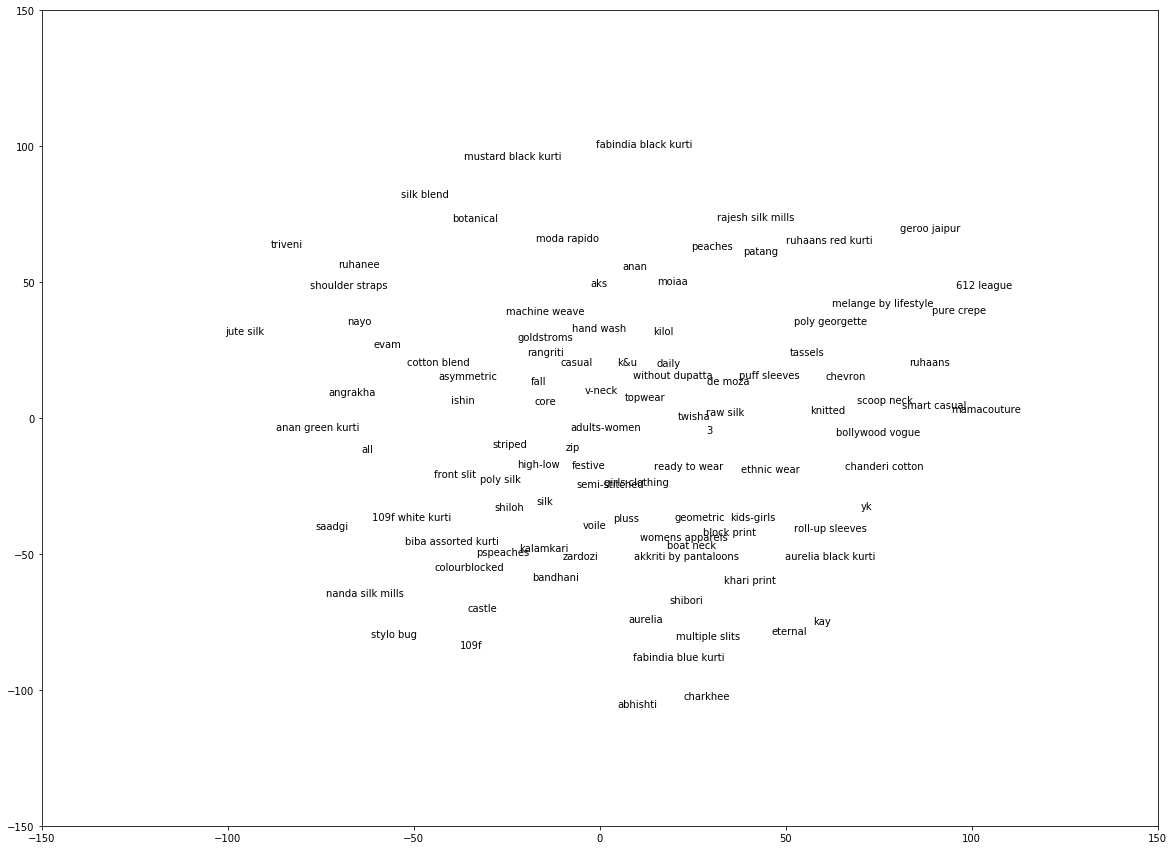

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)
fig, ax = plt.subplots()
ax.set_ylim(-150,150)
ax.set_xlim(-150,150)
# print(words)
c =0;
for word in words:
#     print(word, vectors[word2int[word]][1])
    if c%2 ==0:
        ax.annotate(word, xy=(vectors[word2int[word]][0],vectors[word2int[word]][1] ))
    c=c+1
    if c > 200:
        break;
plt.show()

In [ ]:
# vectors